In [129]:
library(readr) #read file
library(dplyr) #data manipulation
library(tidyr) #overall
library(lubridate) #read date
library(tibble)
library(ggplot2) # graphing
library(stringr) #string manipulation

In [130]:

# @hidden_cell

if (Sys.getenv("RUNTIME_ENV_LOCATION_TYPE") == "external") {
    endpoint_099bace1f17346f5bf137ebd1b7bd315 = "s3-api.us-geo.objectstorage.softlayer.net"
} else {
    endpoint_099bace1f17346f5bf137ebd1b7bd315 = "s3-api.us-geo.objectstorage.service.networklayer.com"
}

# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

library("aws.s3")
obj <- get_object(
    object = "githam_water.csv",
    bucket = "tncv2-donotdelete-pr-21clkvymnfbvnw",
    key = "3b7a25ef79064eec9699bffdf37a0c4e",
    secret = "4651eccfe075173b9ea67aae51c33df9cfc56fc8f9f1fa81",
    check_region = FALSE,
    base_url = endpoint_099bace1f17346f5bf137ebd1b7bd315)

githam <- read.csv(text = rawToChar(obj), header=FALSE)
head(githam)


V1                   V2        V3           V4 V5 V6 V7 V8 V9 V10
1 Date Time, GMT+03:00 Temp, °C  Water Level. NA NA NA NA NA NA NA 
2 3/26/15 15:20        27.862    0.294        NA NA NA NA NA NA NA 
3 3/26/15 15:50        26.585    0.287        NA NA NA NA NA NA NA 
4 3/26/15 16:20        26.097    0.288        NA NA NA NA NA NA NA 
5 3/26/15 16:50        25.416    0.283        NA NA NA NA NA NA NA 
6 3/26/15 17:20        24.641    0.291        NA NA NA NA NA NA NA

In [131]:
RawData <- githam[1:3]
Clean_data <- RawData[-1,]

githam = Clean_data %>% mutate( discharge =Clean_data$V3) ##Problem

#separate day, month, year into different columns 
Date_date <- githam 

Date_date$Date <- as.Date(Date_date$V1,format="%m/%d/%y") #%Y/%m/%d
Final_data <- Date_date %>%
  mutate(date=format(Date, "%d"),month = format(Date, "%m"), year = format(Date, "%Y"))

Final_Data_Githam <- Final_data

In [132]:
#daily average in March, April, May
Conclusion1 <- Final_data %>%
  group_by(date,month,year) %>%
  summarise(Average = mean(as.numeric(as.character(discharge)))) 

Conclusion1$md <- paste(Conclusion1$month, Conclusion1$date,sep = "/")
Conclusion2 <- Conclusion1

In [133]:
for (i in (2015:2020)){
  nam <- paste("daymean", i, sep = "")
  print(nam)
  assign(nam,Conclusion2%>%
           filter(year==i))
}
daymean2019$md <- as.factor(daymean2019$md)
daymean2018$md <- as.factor(daymean2018$md)
daymean2017$md <- as.factor(daymean2017$md)
daymean2016$md <- as.factor(daymean2016$md)
daymean2015$md <- as.factor(daymean2015$md)
daymean2020$md <- as.factor(daymean2020$md)

[1] "daymean2015"
[1] "daymean2016"
[1] "daymean2017"
[1] "daymean2018"
[1] "daymean2019"
[1] "daymean2020"


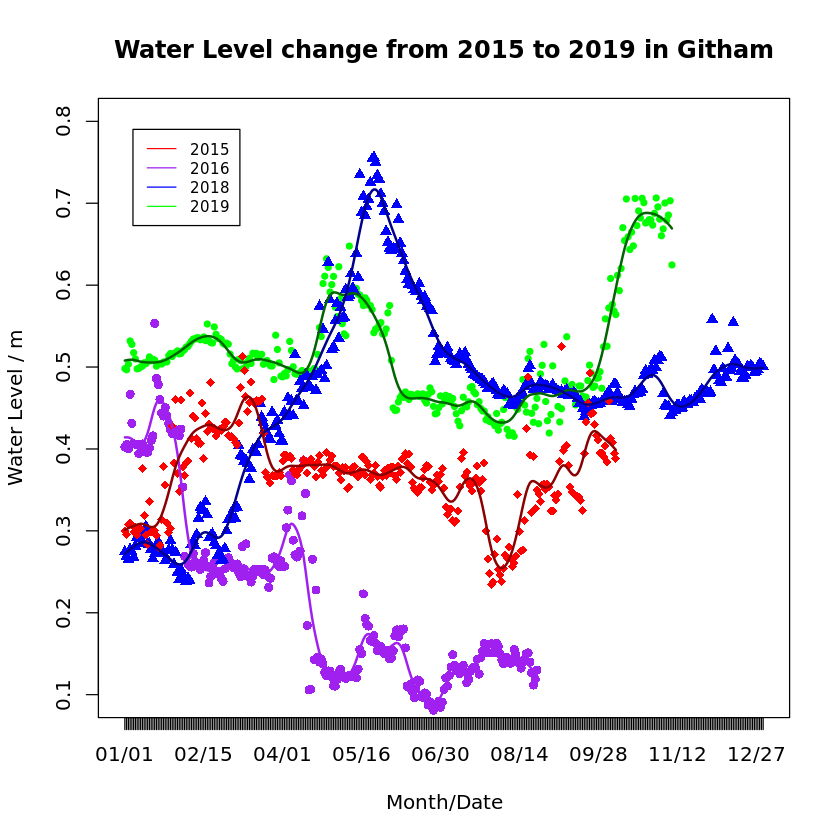

In [134]:
# plot for daily trend from 2015 to 2020 (except for 2017 and 2020)
# plot for daily trend from 2015 to 2020 (except for 2017 and 2020)
plot(daymean2018$md,daymean2018$Average,ylim=c(0.1,0.8),
        main="Water Level change from 2015 to 2019 in Githam",
        xlab="Month/Date",
        ylab="Water Level / m")
lines(daymean2019$md,daymean2019$Average,type="p",pch=20,col="green",xlab="Month/Date",ylab="discharge rate", main="data",ylim=c(0.020,0.055))
lines(daymean2016$md,daymean2016$Average,type="p",pch=16,col="purple",xlab="Month/Date",ylab="discharge rate", main="data")
lines(daymean2018$md,daymean2018$Average,type="p",pch=17,col="blue",xlab="Month/Date",ylab="discharge rate", main="data")
lines(daymean2015$md,daymean2015$Average,type="p",pch=18,col="red",xlab="Month/Date",ylab="discharge rater", main="data")

lines(smooth.spline(daymean2019$Average ~ daymean2019$md, spar = 0.5), 
      col = "darkgreen", lwd = 2)
lines(smooth.spline(daymean2016$Average ~ daymean2016$md, spar = 0.5), 
      col = "purple", lwd = 2)
lines(smooth.spline(daymean2018$Average ~ daymean2018$md, spar = 0.5), 
      col = "darkblue", lwd = 2)
lines(smooth.spline(daymean2015$Average ~ daymean2015$md, spar = 0.5), col = "darkred", lwd = 2,)

legend("topleft",inset=.05,legend=c("2015","2016","2018","2019"), col=c("red","purple",'blue','green'),lty=1, ncol=1,cex=0.75)

### Karuru Water

In [135]:
# @hidden_cell

obj <- get_object(
    object = "karuru_water.csv",
    bucket = "tncv2-donotdelete-pr-21clkvymnfbvnw",
    key = "3b7a25ef79064eec9699bffdf37a0c4e",
    secret = "4651eccfe075173b9ea67aae51c33df9cfc56fc8f9f1fa81",
    check_region = FALSE,
    base_url = endpoint_099bace1f17346f5bf137ebd1b7bd315)

Karuru <- read.csv(text = rawToChar(obj), header = FALSE)
head(Karuru)


V1                   V2        V3              V4 V5 V6 V7 V8 V9 V10
1 Date Time, GMT+03:00 Temp (°C) Water level (m) NA NA NA NA NA NA NA 
2 2015/3/26 17:00      23.677    0.445           NA NA NA NA NA NA NA 
3 2015/3/26 17:30      23.292    0.449           NA NA NA NA NA NA NA 
4 2015/3/26 18:00      23.292    0.45            NA NA NA NA NA NA NA 
5 2015/3/26 18:30      23.292    0.453           NA NA NA NA NA NA NA 
6 2015/3/26 19:00      23.292    0.455           NA NA NA NA NA NA NA

In [136]:
RawData <- Karuru[1:3]
Clean_data <- RawData[-1,]

Karuru = Clean_data %>% mutate( discharge =Clean_data$V3) ##Problem

#separate day, month, year into different columns 
Date_date <- Karuru

Date_date$Date <- as.Date(Date_date$V1,format="%Y/%m/%d") #%Y/%m/%d
Final_data <- Date_date %>%
  mutate(date=format(Date, "%d"),month = format(Date, "%m"), year = format(Date, "%Y"))

Final_Data_Karuru <- Final_data

In [137]:
#daily average in March, April, May
Conclusion1 <- Final_data %>%
  group_by(date,month,year) %>%
  summarise(Average = mean(as.numeric(as.character(discharge))))

Conclusion1$md <- paste(Conclusion1$month, Conclusion1$date,sep = "/")
Conclusion2 <- Conclusion1

In [138]:
for (i in (2015:2020)){
  nam <- paste("daymean", i, sep = "")
  print(nam)
  assign(nam,Conclusion2%>%
           filter(year==i))
}
daymean2019$md <- as.factor(daymean2019$md)
daymean2018$md <- as.factor(daymean2018$md)
daymean2017$md <- as.factor(daymean2017$md)
daymean2016$md <- as.factor(daymean2016$md)
daymean2015$md <- as.factor(daymean2015$md)
daymean2020$md <- as.factor(daymean2020$md)

[1] "daymean2015"
[1] "daymean2016"
[1] "daymean2017"
[1] "daymean2018"
[1] "daymean2019"
[1] "daymean2020"


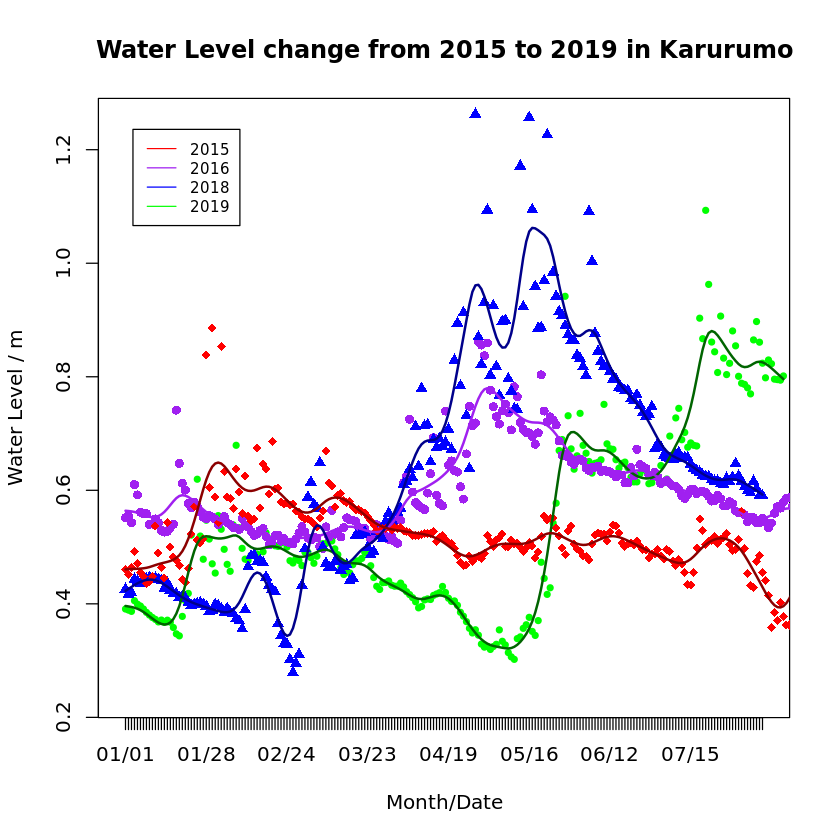

In [139]:
# plot for daily trend from 2015 to 2020 (except for 2017 and 2020)
# plot for daily trend from 2015 to 2020 (except for 2017 and 2020)
plot(daymean2018$md,daymean2018$Average,ylim=c(0.24,1.25),
        main="Water Level change from 2015 to 2019 in Karurumo",
        xlab="Month/Date",
        ylab="Water Level / m")
lines(daymean2019$md,daymean2019$Average,type="p",pch=20,col="green",xlab="Month/Date",ylab="discharge rate", main="data",ylim=c(0.020,0.055))
lines(daymean2016$md,daymean2016$Average,type="p",pch=16,col="purple",xlab="Month/Date",ylab="discharge rate", main="data")
lines(daymean2018$md,daymean2018$Average,type="p",pch=17,col="blue",xlab="Month/Date",ylab="discharge rate", main="data")
lines(daymean2015$md,daymean2015$Average,type="p",pch=18,col="red",xlab="Month/Date",ylab="discharge rater", main="data")

lines(smooth.spline(daymean2019$Average ~ daymean2019$md, spar = 0.5), 
      col = "darkgreen", lwd = 2)
lines(smooth.spline(daymean2016$Average ~ daymean2016$md, spar = 0.5), 
      col = "purple", lwd = 2)
lines(smooth.spline(daymean2018$Average ~ daymean2018$md, spar = 0.5), 
      col = "darkblue", lwd = 2)
lines(smooth.spline(daymean2015$Average ~ daymean2015$md, spar = 0.5), col = "darkred", lwd = 2,)

legend("topleft",inset=.05,legend=c("2015","2016","2018","2019"), col=c("red","purple",'blue','green'),lty=1, ncol=1,cex=0.75)

In [140]:
Final_Data_Githam
str(Final_Data_Githam)

V1            V2     V3    discharge Date       date month year
1     3/26/15 15:20 27.862 0.294 0.294     2015-03-26 26   03    2015
2     3/26/15 15:50 26.585 0.287 0.287     2015-03-26 26   03    2015
3     3/26/15 16:20 26.097 0.288 0.288     2015-03-26 26   03    2015
4     3/26/15 16:50 25.416 0.283 0.283     2015-03-26 26   03    2015
5     3/26/15 17:20 24.641 0.291 0.291     2015-03-26 26   03    2015
6     3/26/15 17:50 23.869 0.292 0.292     2015-03-26 26   03    2015
7     3/26/15 18:20 23.484 0.295 0.295     2015-03-26 26   03    2015
8     3/26/15 18:50 23.196 0.297 0.297     2015-03-26 26   03    2015
9     3/26/15 19:20 23.004 0.301 0.301     2015-03-26 26   03    2015
10    3/26/15 19:50 22.717 0.302 0.302     2015-03-26 26   03    2015
11    3/26/15 20:20 22.621 0.303 0.303     2015-03-26 26   03    2015
12    3/26/15 20:50 22.525 0.304 0.304     2015-03-26 26   03    2015
13    3/26/15 21:20 22.333 0.308 0.308     2015-03-26 26   03    2015
14    3/26/15 21:50 22.238 0.311 0.311     2015-03-26 26   03    2015
15    3/26/15 22:20 22.238 0.311 0.311     2015-03-26 26   03    2015
16    3/26/15 22:50 22.142 0.31  0.31      2015-03-26 26   03    2015
17    3/26/15 23:20 22.142 0.31  0.31      2015-03-26 26   03    2015
18    3/26/15 23:50 22.046 0.31  0.31      2015-03-26 26   03    2015
19    3/27/15 0:20  21.951 0.306 0.306     2015-03-27 27   03    2015
20    3/27/15 0:50  21.76  0.301 0.301     2015-03-27 27   03    2015
21    3/27/15 1:20  21.76  0.297 0.297     2015-03-27 27   03    2015
22    3/27/15 1:50  21.76  0.294 0.294     2015-03-27 27   03    2015
23    3/27/15 2:20  21.76  0.293 0.293     2015-03-27 27   03    2015
24    3/27/15 2:50  21.664 0.291 0.291     2015-03-27 27   03    2015
25    3/27/15 3:20  21.569 0.29  0.29      2015-03-27 27   03    2015
26    3/27/15 3:50  21.473 0.288 0.288     2015-03-27 27   03    2015
27    3/27/15 4:20  21.473 0.29  0.29      2015-03-27 27   03    2015
28    3/27/15 4:50  21.282 0.291 0.291     2015-03-27 27   03    2015
29    3/27/15 5:20  21.091 0.293 0.293     2015-03-27 27   03    2015
30    3/27/15 5:50  21.091 0.295 0.295     2015-03-27 27   03    2015
...   ...           ...    ...   ...       ...        ...  ...   ... 
60236 1/14/20 20:30 22.429 0.408 0.408     2020-01-14 14   01    2020
60237 1/14/20 21:00 22.333 0.409 0.409     2020-01-14 14   01    2020
60238 1/14/20 21:30 22.238 0.412 0.412     2020-01-14 14   01    2020
60239 1/14/20 22:00 22.142 0.415 0.415     2020-01-14 14   01    2020
60240 1/14/20 22:30 22.142 0.415 0.415     2020-01-14 14   01    2020
60241 1/14/20 23:00 22.142 0.416 0.416     2020-01-14 14   01    2020
60242 1/14/20 23:30 22.046 0.413 0.413     2020-01-14 14   01    2020
60243 1/15/20 0:00  22.046 0.408 0.408     2020-01-15 15   01    2020
60244 1/15/20 0:30  21.951 0.406 0.406     2020-01-15 15   01    2020
60245 1/15/20 1:00  21.855 0.401 0.401     2020-01-15 15   01    2020
60246 1/15/20 1:30  21.855 0.406 0.406     2020-01-15 15   01    2020
60247 1/15/20 2:00  21.76  0.437 0.437     2020-01-15 15   01    2020
60248 1/15/20 2:30  21.569 0.442 0.442     2020-01-15 15   01    2020
60249 1/15/20 3:00  21.664 0.425 0.425     2020-01-15 15   01    2020
60250 1/15/20 3:30  21.664 0.419 0.419     2020-01-15 15   01    2020
60251 1/15/20 4:00  21.664 0.417 0.417     2020-01-15 15   01    2020
60252 1/15/20 4:30  21.664 0.416 0.416     2020-01-15 15   01    2020
60253 1/15/20 5:00  21.569 0.411 0.411     2020-01-15 15   01    2020
60254 1/15/20 5:30  21.569 0.412 0.412     2020-01-15 15   01    2020
60255 1/15/20 6:00  21.569 0.415 0.415     2020-01-15 15   01    2020
60256 1/15/20 6:30  21.473 0.412 0.412     2020-01-15 15   01    2020
60257 1/15/20 7:00  21.378 0.408 0.408     2020-01-15 15   01    2020
60258 1/15/20 7:30  21.378 0.416 0.416     2020-01-15 15   01    2020
60259 1/15/20 8:00  21.473 0.418 0.418     2020-01-15 15   01    2020
60260 1/15/20 8:30  21.855 0.417 0.417     2020-01-15 15   01    2020
60261 1/15/20 9:

'data.frame':	60265 obs. of  8 variables:
 $ V1       : Factor w/ 60242 levels "1/1/16 0:20",..: 27410 27411 27412 27413 27414 27415 27416 27417 27418 27419 ...
 $ V2       : Factor w/ 124 levels "17.76","17.855",..: 106 93 88 81 73 65 61 58 56 53 ...
 $ V3       : Factor w/ 816 levels "0.026","0.033",..: 247 240 241 236 244 245 248 250 254 255 ...
 $ discharge: Factor w/ 816 levels "0.026","0.033",..: 247 240 241 236 244 245 248 250 254 255 ...
 $ Date     : Date, format: "2015-03-26" "2015-03-26" ...
 $ date     : chr  "26" "26" "26" "26" ...
 $ month    : chr  "03" "03" "03" "03" ...
 $ year     : chr  "2015" "2015" "2015" "2015" ...


In [141]:
summary(Final_Data_Karuru)

                V1              V2              V3          discharge    
 2019/10/15 04:30:    2   21.76  : 1968   0.535  :  264   0.535  :  264  
 2019/10/15 05:00:    2   21.855 : 1877   0.509  :  257   0.509  :  257  
 2019/10/15 05:30:    2   21.664 : 1868   0.523  :  245   0.523  :  245  
 2019/10/15 06:00:    2   21.569 : 1844   0.536  :  243   0.536  :  243  
 2019/10/15 06:30:    2   21.473 : 1715   0.534  :  242   0.534  :  242  
 2019/10/15 07:00:    2   21.091 : 1656   0.52   :  240   0.52   :  240  
 (Other)         :50200   (Other):39284   (Other):48721   (Other):48721  
      Date                date              month               year          
 Min.   :2015-03-26   Length:50212       Length:50212       Length:50212      
 1st Qu.:2015-12-13   Class :character   Class :character   Class :character  
 Median :2016-08-30   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2017-05-16                                                           
 3rd Qu.:2018

This cell cleans data in order to prepare it for an ANOVA Analysis

In [142]:
# filter out data so only discharge and month remain
Final_Data_Githam <- select(Final_Data_Githam, discharge, month)
Final_Data_Karuru <- select(Final_Data_Karuru, discharge, month)

#convert month from character to number
Final_Data_Githam <- mutate(Final_Data_Githam, Month = as.numeric(Final_Data_Githam$month))
Final_Data_Karuru <- mutate(Final_Data_Karuru, Month = as.numeric(Final_Data_Karuru$month))

#remove unnecessary character month column
Final_Data_Githam <- select(Final_Data_Githam, -month)
Final_Data_Karuru <- select(Final_Data_Karuru, -month)

# create a new column that classifies if the month is in the rainy season or dry season
Final_Data_Githam <- mutate(Final_Data_Githam, Season = ifelse(Month == 1 | Month ==3| Month ==4| Month ==5|Month ==10|Month ==11|Month ==12, "Rainy_Season_Githam","Dry_Season_Githam" ))
Final_Data_Karuru <- mutate(Final_Data_Karuru, Season = ifelse(Month == 1 | Month ==3| Month ==4| Month ==5|Month ==10|Month ==11|Month ==12, "Rainy_Season_Karuru","Dry_Season_Karuru" ))

#Remove month coulmn
Final_Data_Githam <- select(Final_Data_Githam, -Month)
Final_Data_Karuru <- select(Final_Data_Karuru, -Month)

#convert Discharge from factor to number
Final_Data_Githam <- mutate(Final_Data_Githam, Discharge = as.numeric(as.character(Final_Data_Githam$discharge)))
Final_Data_Karuru <- mutate(Final_Data_Karuru, Discharge = as.numeric(as.character(Final_Data_Karuru$discharge)))

#Remove factor discharge column

Final_Data_Githam <- select(Final_Data_Githam, -discharge)
Final_Data_Karuru <- select(Final_Data_Karuru, -discharge)

#stack rows on top of one another for ANOVA Analysis

Githam_Karuru_stacked <- bind_rows(Final_Data_Githam,Final_Data_Karuru)

#sort dataframe by Season column

Githam_Karuru_stacked <- Githam_Karuru_stacked %>% arrange(Season)

#create table with mean discharge for all four categories
Githam_Karuru_mean <- group_by(Githam_Karuru_stacked, Season)
Githam_Karuru_mean <- summarise(Githam_Karuru_mean, Avg_discharge = mean(Discharge))
Githam_Karuru_mean <- ungroup(Githam_Karuru_mean)

Githam_Karuru_mean

str(Githam_Karuru_stacked)

Season              Avg_discharge
1 Dry_Season_Githam   0.3606085    
2 Dry_Season_Karuru   0.5387143    
3 Rainy_Season_Githam 0.4350048    
4 Rainy_Season_Karuru 0.5876675

'data.frame':	110477 obs. of  2 variables:
 $ Season   : chr  "Dry_Season_Githam" "Dry_Season_Githam" "Dry_Season_Githam" "Dry_Season_Githam" ...
 $ Discharge: num  0.55 0.552 0.549 0.569 0.575 0.59 0.591 0.578 0.567 0.557 ...


Boxplot Graphs to provide a visual precursor for the ANOVA test and t-tests

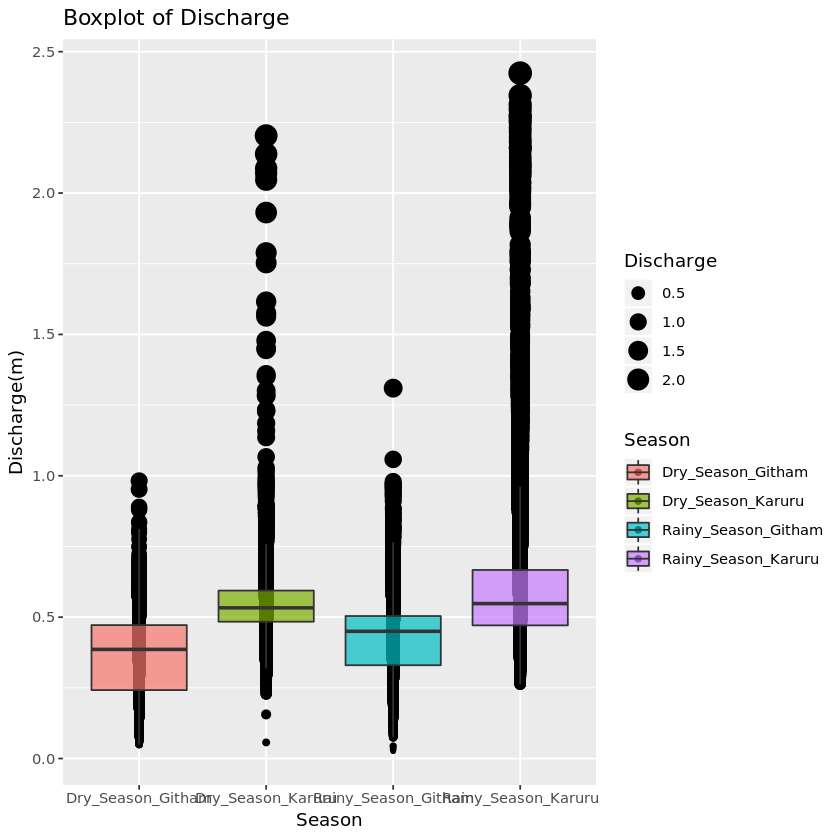

In [143]:
ggplot(Githam_Karuru_stacked , aes(x =Season, y = Discharge, fill = Season))+
  geom_point(aes(size = Discharge))+
  geom_boxplot(alpha = .7, outlier.colour = NA)+
  labs(title = "Boxplot of Discharge" ,  y = "Discharge(m)", x = "Season")

This cell runs the ANOVA test and presents the results. The null hypothesis is that the difference in mean between every group (rainy-season Githam, dry-season Githam, rainy-season Karurumo, and dry-season Karumo) is zero. In other words the mean discharge for all for groups are the same.

In [144]:
# ANOVA Test

Githam_Karuru_ANOVA <- aov(formula = Discharge ~ Season, data = Githam_Karuru_stacked)
summary(Githam_Karuru_ANOVA)

                Df Sum Sq Mean Sq F value Pr(>F)    
Season           3  840.2  280.06   13521 <2e-16 ***
Residuals   110473 2288.2    0.02                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

An extremely low p-value (p<.05) allows us to reject the null hypothesis and conclude that there is a statistically significant difference between location and season on discharge. Additionally, an extremely high F-value confirms that the variance between groups is significantly higher than variance within groups. This further confirms our conclusion to negelect the null hypothesis. Logically this makes sense since rainy season and dry season should yield significantly different discharge rate. The next step is to conduct individual t-tests to find specifcally what variables are significantly different.

In [145]:
# t-test Rainy Season between Githam and Karuru 


#create appropriate data table
n1 <- 1
index_dry <- vector(mode = "list")

for (j in 1:length(Githam_Karuru_stacked$Discharge)) {
  if(str_length(Githam_Karuru_stacked[j,1]) == 17){
    
    index_dry[n1] <- j
    
    n1 <- n1+1
    
  }
}

index_dry

Rainy_Ttest <- t.test(Githam_Karuru_stacked$Season == "Rainy_Season_Githam", Githam_Karuru_stacked$Season =="Rainy_Season_Karurumo",  mu = 0, conf = .95, var.eq = FALSE, paired = FALSE)
Rainy_Ttest



[[1]]
[1] 1

[[2]]
[1] 2

[[3]]
[1] 3

[[4]]
[1] 4

[[5]]
[1] 5

[[6]]
[1] 6

[[7]]
[1] 7

[[8]]
[1] 8

[[9]]
[1] 9

[[10]]
[1] 10

[[11]]
[1] 11

[[12]]
[1] 12

[[13]]
[1] 13

[[14]]
[1] 14

[[15]]
[1] 15

[[16]]
[1] 16

[[17]]
[1] 17

[[18]]
[1] 18

[[19]]
[1] 19

[[20]]
[1] 20

[[21]]
[1] 21

[[22]]
[1] 22

[[23]]
[1] 23

[[24]]
[1] 24

[[25]]
[1] 25

[[26]]
[1] 26

[[27]]
[1] 27

[[28]]
[1] 28

[[29]]
[1] 29

[[30]]
[1] 30

[[31]]
[1] 31

[[32]]
[1] 32

[[33]]
[1] 33

[[34]]
[1] 34

[[35]]
[1] 35

[[36]]
[1] 36

[[37]]
[1] 37

[[38]]
[1] 38

[[39]]
[1] 39

[[40]]
[1] 40

[[41]]
[1] 41

[[42]]
[1] 42

[[43]]
[1] 43

[[44]]
[1] 44

[[45]]
[1] 45

[[46]]
[1] 46

[[47]]
[1] 47

[[48]]
[1] 48

[[49]]
[1] 49

[[50]]
[1] 50

[[51]]
[1] 51

[[52]]
[1] 52

[[53]]
[1] 53

[[54]]
[1] 54

[[55]]
[1] 55

[[56]]
[1] 56

[[57]]
[1] 57

[[58]]
[1] 58

[[59]]
[1] 59

[[60]]
[1] 60

[[61]]
[1] 61

[[62]]
[1] 62

[[63]]
[1] 63

[[64]]
[1] 64

[[65]]
[1] 65

[[66]]
[1] 66

[[67]]
[1] 67

[[68]]
[1] 68

[[69]]
[1] 69

[[70]]
[1] 70

[[71]]
[1] 71

[[72]]
[1] 72

[[73]]
[1] 73

[[74]]
[1] 74

[[75]]
[1] 75

[[76]]
[1] 76

[[77]]
[1] 77

[[78]]
[1] 78

[[79]]
[1] 79

[[80]]
[1] 80

[[81]]
[1] 81

[[82]]
[1] 82

[[83]]
[1] 83

[[84]]
[1] 84

[[85]]
[1] 85

[[86]]
[1] 86

[[87]]
[1] 87

[[88]]
[1] 88

[[89]]
[1] 89

[[90]]
[1] 90

[[91]]
[1] 91

[[92]]
[1] 92

[[93]]
[1] 93

[[94]]
[1] 94

[[95]]
[1] 95

[[96]]
[1] 96

[[97]]
[1] 97

[[98]]
[1] 98

[[99]]
[1] 99

[[100]]
[1] 100

[[101]]
[1] 101

[[102]]
[1] 102

[[103]]
[1] 103

[[104]]
[1] 104

[[105]]
[1] 105

[[106]]
[1] 106

[[107]]
[1] 107

[[108]]
[1] 108

[[109]]
[1] 109

[[110]]
[1] 110

[[111]]
[1] 111

[[112]]
[1] 112

[[113]]
[1] 113

[[114]]
[1] 114

[[115]]
[1] 115

[[116]]
[1] 116

[[117]]
[1] 117

[[118]]
[1] 118

[[119]]
[1] 119

[[120]]
[1] 120

[[121]]
[1] 121

[[122]]
[1] 122

[[123]]
[1] 123

[[124]]
[1] 124

[[125]]
[1] 125

[[126]]
[1] 126

[[127]]
[1] 127

[[128]]
[1] 128

[[129]]
[1] 129

[[130]]
[1] 130

[[131]]
[1] 131

[[132]]
[1] 132

[[133]]
[1] 133

[[134]]
[1] 134

[[135]]
[1] 135

[[136]]
[1] 136

[[137]]
[1] 137

[[138]]
[1] 138

[[139]]
[1] 139

[[140]]
[1] 140

[[141]]
[1] 141

[[142]]
[1] 142

[[143]]
[1] 143

[[144]]
[1] 144

[[145]]
[1] 145

[[146]]
[1] 146

[[147]]
[1] 147

[[148]]
[1] 148

[[149]]
[1] 149

[[150]]
[1] 150

[[151]]
[1] 151

[[152]]
[1] 152

[[153]]
[1] 153

[[154]]
[1] 154

[[155]]
[1] 155

[[156]]
[1] 156

[[157]]
[1] 157

[[158]]
[1] 158

[[159]]
[1] 159

[[160]]
[1] 160

[[161]]
[1] 161

[[162]]
[1] 162

[[163]]
[1] 163

[[164]]
[1] 164

[[165]]
[1] 165

[[166]]
[1] 166

[[167]]
[1] 167

[[168]]
[1] 168

[[169]]
[1] 169

[[170]]
[1] 170

[[171]]
[1] 171

[[172]]
[1] 172

[[173]]
[1] 173

[[174]]
[1] 174

[[175]]
[1] 175

[[176]]
[1] 176

[[177]]
[1] 177

[[178]]
[1] 178

[[179]]
[1] 179

[[180]]
[1] 180

[[181]]
[1] 181

[[182]]
[1] 182

[[183]]
[1] 183

[[184]]
[1] 184

[[185]]
[1] 185

[[186]]
[1] 186

[[187]]
[1] 187

[[188]]
[1] 188

[[189]]
[1] 189

[[190]]
[1] 190

[[191]]
[1] 191

[[192]]
[1] 192

[[193]]
[1] 193

[[194]]
[1] 194

[[195]]
[1] 195

[[196]]
[1] 196

[[197]]
[1] 197

[[198]]
[1] 198

[[199]]
[1] 199

[[200]]
[1] 200

[[201]]
[1] 201

[[202]]
[1] 202

[[203]]
[1] 203

[[204]]
[1] 204

[[205]]
[1] 205

[[206]]
[1] 206

[[207]]
[1] 207

[[208]]
[1] 208

[[209]]
[1] 209

[[210]]
[1] 210

[[211]]
[1] 211

[[212]]
[1] 212

[[213]]
[1] 213

[[214]]
[1] 214

[[215]]
[1] 215

[[216]]
[1] 216

[[217]]
[1] 217

[[218]]
[1] 218

[[219]]
[1] 219

[[220]]
[1] 220

[[221]]
[1] 221

[[222]]
[1] 222

[[223]]
[1] 223

[[224]]
[1] 224

[[225]]
[1] 225

[[226]]
[1] 226

[[227]]
[1] 227

[[228]]
[1] 228

[[229]]
[1] 229

[[230]]
[1] 230

[[231]]
[1] 231

[[232]]
[1] 232

[[233]]
[1] 233

[[234]]
[1] 234

[[235]]
[1] 235

[[236]]
[1] 236

[[237]]
[1] 237

[[238]]
[1] 238

[[239]]
[1] 239

[[240]]
[1] 240

[[241]]
[1] 241

[[242]]
[1] 242

[[243]]
[1] 243

[[244]]
[1] 244

[[245]]
[1] 245

[[246]]
[1] 246

[[247]]
[1] 247

[[248]]
[1] 248




	Welch Two Sample t-test

data:  Githam_Karuru_stacked$Season == "Rainy_Season_Githam" and Githam_Karuru_stacked$Season == "Rainy_Season_Karurumo"
t = 228.49, df = 110476, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.3181647 0.3236703
sample estimates:
mean of x mean of y 
0.3209175 0.0000000 


An extremely low p-value (p<.05) allows us to neglect the null hypothesis and confirm the difference in mean between the two subwatersheds in the Rainy Season is statistically significant

In [146]:
# t-test dry Season between Githam and Karuru 
Dry_Ttest <- t.test(Githam_Karuru_stacked$Season == "Dry_Season_Githam", Githam_Karuru_stacked$Season =="Dry_Season_Karuru",  mu = 0, conf = .95, var.eq = FALSE, paired = FALSE)
Dry_Ttest


	Welch Two Sample t-test

data:  Githam_Karuru_stacked$Season == "Dry_Season_Githam" and Githam_Karuru_stacked$Season == "Dry_Season_Karuru"
t = 22.643, df = 219862, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.03549514 0.04222239
sample estimates:
mean of x mean of y 
0.2245807 0.1857219 


An extremely low p-value (p<.05) allows us to neglect the null hypothesis and confirm the difference in mean between the two subwatersheds in the Dry Season is statistically significant

In [147]:
# t-test Githam between Rainy and Dry seasons 

Githam_Ttest <- t.test(Discharge ~ Season, data = Final_Data_Githam, mu = 0, conf = .95, var.eq = FALSE, paired = FALSE)
Githam_Ttest


	Welch Two Sample t-test

data:  Discharge by Season
t = -64.449, df = 47360, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.07665876 -0.07213373
sample estimates:
  mean in group Dry_Season_Githam mean in group Rainy_Season_Githam 
                        0.3606085                         0.4350048 


In [148]:
# t-test Githam between Rainy and Dry seasons 

Karuru_Ttest <- t.test(Discharge ~ Season, data = Final_Data_Karuru, mu = 0, conf = .95, var.eq = FALSE, paired = FALSE)
Karuru_Ttest


	Welch Two Sample t-test

data:  Discharge by Season
t = -38.055, df = 49720, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.05147446 -0.04643186
sample estimates:
  mean in group Dry_Season_Karuru mean in group Rainy_Season_Karuru 
                        0.5387143                         0.5876675 
